In [1]:
# Import Library
import pandas as pd
import numpy as np
import nltk
import string
import re
from textblob import TextBlob

In [2]:
# Load Data Tweet
def load_data(i):
    data = pd.read_csv(i)
    return data

In [3]:
df = load_data('Dataset/NFT 2k.csv')

In [4]:
df

,Time,User,Tweets
0,2022-03-29 00:05:54+00:00,501Awani,NFT adalah aset kriptografi di blockchain deng...
1,2022-03-26 08:17:40+00:00,erickthohir,Karya seni bergambar wajah saya sampai Preside...
2,2022-03-24 06:34:33+00:00,Edhie_Baskoro,Teknologi &amp; Perdagangan komoditas semakin...
3,2022-03-29 10:10:20+00:00,hossain553_md,@0xPolygon @Mliki_id $MLIKI #Commerce #NFT #In...
4,2022-03-29 10:10:14+00:00,sukeblog314,@ADMEN_DAO @PREMINT_NFT @daikoujyou @Pisuke_nf...
...,...,...,...
995,2022-03-24 04:33:05+00:00,ItsMamitaa,RT @resaalfny: $100 | 1.4 JUTA RUPIAH ~ 24 HOU...
996,2022-03-24 04:33:02+00:00,BamsAndriansyah,@furrincrypto @Symbio_NFT Bismillah done
997,2022-03-24 04:32:53+00:00,Aquabigwin13,@sof1azara03 @daddy_nft Bismillaahirrohmaanirr...
998,2022-03-24 04:32:52+00:00,kielcityx,RT @resaalfny: $100 | 1.4 JUTA RUPIAH ~ 24 HOU...


In [5]:
#Case Folding
def cf(tweet):
    tweet = tweet.casefold()
    return tweet
df['CaseFold'] = df['Tweets'].apply(cf)


#Cleansing
def clean(tweet):
    tweet = re.sub(r'@\w_\w+', '', tweet)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'_', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'rt[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/\S+', '', tweet)
    tweet =  re.sub(r'[0-9]\w+', '', tweet)
    tweet =  re.sub(r'[0-9]+', '', tweet)
    tweet =  re.sub(r'\n+', ' ', tweet)
    tweet =  re.sub(r'\W+', ' ', tweet)
    return tweet
df['Cleansing'] = df['CaseFold'].apply(clean)
df['Cleansing'].replace(' ', np.nan, inplace=True)
df.dropna(subset=['Cleansing'], inplace=True)


# Stopwords Removal
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

stopwEng = stopwords.words('english')
stopwIN = StopWordRemoverFactory().get_stop_words()

df['StopW'] = df['Cleansing'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwEng)]))
df['StopW'] = df['StopW'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwIN)]))

df['StopW'].replace('', np.nan, inplace=True)
df.dropna(subset=['StopW'], inplace=True)


#Tokenizing
from nltk.tokenize import TweetTokenizer

def tokenize(tweet): 
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    return tweet_tokens
    
df['Tokenizing'] = df['StopW'].apply(tokenize)


#Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(tweet):
    tweets_clean = []   
    for word in tweet:
        stem = stemmer.stem(word) # stemming word
        tweets_clean.append(stem)
    return tweets_clean

df['Stemming'] = df['Tokenizing'].apply(stemming)

In [6]:
df

,Time,User,Tweets,CaseFold,Cleansing,StopW,Tokenizing,Stemming
0,2022-03-29 00:05:54+00:00,501Awani,NFT adalah aset kriptografi di blockchain deng...,nft adalah aset kriptografi di blockchain deng...,nft adalah aset kriptografi di blockchain deng...,nft aset kriptografi blockchain kod pengenalan...,"[nft, aset, kriptografi, blockchain, kod, peng...","[nft, aset, kriptografi, blockchain, kod, kena..."
1,2022-03-26 08:17:40+00:00,erickthohir,Karya seni bergambar wajah saya sampai Preside...,karya seni bergambar wajah saya sampai preside...,karya seni bergambar wajah saya sampai preside...,karya seni bergambar wajah presiden terpampang...,"[karya, seni, bergambar, wajah, presiden, terp...","[karya, seni, gambar, wajah, presiden, pampang..."
2,2022-03-24 06:34:33+00:00,Edhie_Baskoro,Teknologi &amp; Perdagangan komoditas semakin...,teknologi &amp; perdagangan komoditas semakin...,teknologi amp perdagangan komoditas semakin be...,teknologi amp perdagangan komoditas bervariasi...,"[teknologi, amp, perdagangan, komoditas, berva...","[teknologi, amp, dagang, komoditas, variasi, r..."
3,2022-03-29 10:10:20+00:00,hossain553_md,@0xPolygon @Mliki_id $MLIKI #Commerce #NFT #In...,@0xpolygon @mliki_id $mliki #commerce #nft #in...,mliki commerce nft invest gems polygon,mliki commerce nft invest gems polygon,"[mliki, commerce, nft, invest, gems, polygon]","[mliki, commerce, nft, invest, gems, polygon]"
4,2022-03-29 10:10:14+00:00,sukeblog314,@ADMEN_DAO @PREMINT_NFT @daikoujyou @Pisuke_nf...,@admen_dao @premint_nft @daikoujyou @pisuke_nf...,prekjc,prekjc,[prekjc],[prekjc]
...,...,...,...,...,...,...,...,...
995,2022-03-24 04:33:05+00:00,ItsMamitaa,RT @resaalfny: $100 | 1.4 JUTA RUPIAH ~ 24 HOU...,rt @resaalfny: $100 | 1.4 juta rupiah ~ 24 hou...,juta rupiah hours like amp follow,juta rupiah hours like amp follow,"[juta, rupiah, hours, like, amp, follow]","[juta, rupiah, hours, like, amp, follow]"
996,2022-03-24 04:33:02+00:00,BamsAndriansyah,@furrincrypto @Symbio_NFT Bismillah done,@furrincrypto @symbio_nft bismillah done,bismillah done,bismillah done,"[bismillah, done]","[bismillah, done]"
997,2022-03-24 04:32:53+00:00,Aquabigwin13,@sof1azara03 @daddy_nft Bismillaahirrohmaanirr...,@sof1azara03 @daddy_nft bismillaahirrohmaanirr...,bismillaahirrohmaanirrohiim done,bismillaahirrohmaanirrohiim done,"[bismillaahirrohmaanirrohiim, done]","[bismillaahirrohmaanirrohiim, done]"
998,2022-03-24 04:32:52+00:00,kielcityx,RT @resaalfny: $100 | 1.4 JUTA RUPIAH ~ 24 HOU...,rt @resaalfny: $100 | 1.4 juta rupiah ~ 24 hou...,juta rupiah hours like amp follow,juta rupiah hours like amp follow,"[juta, rupiah, hours, like, amp, follow]","[juta, rupiah, hours, like, amp, follow]"


In [34]:
# Labelling

Lpro = dict()

import csv
with open('labelling/pros.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        Lpro[row[0]] = int(row[1])

Lkontra = dict()
import csv
with open('labelling/kons.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        Lkontra[row[0]] = int(row[1])
        
# Memberi Label pada tweet sesuai dengan polarity         
def labelling_indo(text):
    score = 0
    for word in text:
        if (word in Lpro):
            score = score + Lpro[word]
    for word in text:
        if (word in Lkontra):
            score = score + Lkontra[word]
    polarity=''
    if (score > 0):
        polarity = 'Pro'
    elif (score < 0):
        polarity = 'Kontra'
    else:
        polarity = 'Netral'
    return score, polarity

In [35]:
results = df['Stemming'].apply(labelling_indo)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['Label'] = results[1]
print(df['Label'].value_counts())
df

Pro       363
Netral    320
Kontra    143
Name: Label, dtype: int64


,Time,User,Tweets,CaseFold,Cleansing,StopW,Tokenizing,Stemming,polarity_score,Label,TF,TF-IDF,TF_IDF_Vec
0,2022-03-29 00:05:54+00:00,501Awani,NFT adalah aset kriptografi di blockchain deng...,nft adalah aset kriptografi di blockchain deng...,nft adalah aset kriptografi di blockchain deng...,nft aset kriptografi blockchain kod pengenalan...,"[nft, aset, kriptografi, blockchain, kod, peng...","[nft, aset, kriptografi, blockchain, kod, kena...",1,Pro,"{'nft': 0.1111111111111111, 'aset': 0.11111111...","{'nft': 0.0762812362157898, 'aset': 0.19031778...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0762812362157..."
1,2022-03-26 08:17:40+00:00,erickthohir,Karya seni bergambar wajah saya sampai Preside...,karya seni bergambar wajah saya sampai preside...,karya seni bergambar wajah saya sampai preside...,karya seni bergambar wajah presiden terpampang...,"[karya, seni, bergambar, wajah, presiden, terp...","[karya, seni, gambar, wajah, presiden, pampang...",2,Pro,"{'karya': 0.1, 'seni': 0.1, 'gambar': 0.1, 'wa...","{'karya': 0.231492005599242, 'seni': 0.2439858...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0686531125942..."
2,2022-03-24 06:34:33+00:00,Edhie_Baskoro,Teknologi &amp; Perdagangan komoditas semakin...,teknologi &amp; perdagangan komoditas semakin...,teknologi amp perdagangan komoditas semakin be...,teknologi amp perdagangan komoditas bervariasi...,"[teknologi, amp, perdagangan, komoditas, berva...","[teknologi, amp, dagang, komoditas, variasi, r...",0,Netral,"{'teknologi': 0.08333333333333333, 'amp': 0.08...","{'teknologi': 0.24308167061003186, 'amp': 0.04...","[0.04155656300005306, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,2022-03-29 10:10:20+00:00,hossain553_md,@0xPolygon @Mliki_id $MLIKI #Commerce #NFT #In...,@0xpolygon @mliki_id $mliki #commerce #nft #in...,mliki commerce nft invest gems polygon,mliki commerce nft invest gems polygon,"[mliki, commerce, nft, invest, gems, polygon]","[mliki, commerce, nft, invest, gems, polygon]",0,Netral,"{'mliki': 0.16666666666666666, 'commerce': 0.1...","{'mliki': 0.2730377410612589, 'commerce': 0.27...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1144218543236..."
4,2022-03-29 10:10:14+00:00,sukeblog314,@ADMEN_DAO @PREMINT_NFT @daikoujyou @Pisuke_nf...,@admen_dao @premint_nft @daikoujyou @pisuke_nf...,prekjc,prekjc,[prekjc],[prekjc],0,Netral,{'prekjc': 1.0},{'prekjc': 2.9169800473203824},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-03-24 04:33:05+00:00,ItsMamitaa,RT @resaalfny: $100 | 1.4 JUTA RUPIAH ~ 24 HOU...,rt @resaalfny: $100 | 1.4 juta rupiah ~ 24 hou...,juta rupiah hours like amp follow,juta rupiah hours like amp follow,"[juta, rupiah, hours, like, amp, follow]","[juta, rupiah, hours, like, amp, follow]",2,Pro,"{'juta': 0.16666666666666666, 'rupiah': 0.1666...","{'juta': 0.10087103104410464, 'rupiah': 0.1001...","[0.08311312600010612, 0.0991267920977438, 0.09..."
996,2022-03-24 04:33:02+00:00,BamsAndriansyah,@furrincrypto @Symbio_NFT Bismillah done,@furrincrypto @symbio_nft bismillah done,bismillah done,bismillah done,"[bismillah, done]","[bismillah, done]",4,Pro,"{'bismillah': 0.5, 'done': 0.5}","{'bismillah': 0.6417557958703979, 'done': 0.69...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.641..."
997,2022-03-24 04:32:53+00:00,Aquabigwin13,@sof1azara03 @daddy_nft Bismillaahirrohmaanirr...,@sof1azara03 @daddy_nft bismillaahirrohmaanirr...,bismillaahirrohmaanirrohiim done,bismillaahirrohmaanirrohiim done,"[bismillaahirrohmaanirrohiim, done]","[bismillaahirrohmaanirrohiim, done]",0,Netral,"{'bismillaahirrohmaanirrohiim': 0.5, 'done': 0.5}",{'bismillaahirrohmaanirrohiim': 1.458490023660...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
998,2022-03-24 04:32:52+00:00,kielcityx,RT @resaalfny: $100 | 1.4 JUTA RUPIAH ~ 24 HOU...,rt @resaalfny: $100 | 1.4 juta rupiah ~ 24 hou...,juta rupiah hours like amp follow,juta rupiah hours like amp follow,"[juta, rupiah, hours, like, amp, follow]","[juta, rupiah, hours, like, amp, follow]",2,Pro,"{'juta': 0.1

In [9]:
# Melakukan penghitungan TF (Seberapa sering sebuah kata muncul pada suatu dokumen)

def calc_TF(tweet):
    TF_dict = {}
    for term in tweet:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(tweet)
    return TF_dict

df["TF"] = df["Stemming"].apply(calc_TF)

df

,Time,User,Tweets,CaseFold,Cleansing,StopW,Tokenizing,Stemming,polarity_score,Label,TF
0,2022-03-29 00:05:54+00:00,501Awani,NFT adalah aset kriptografi di blockchain deng...,nft adalah aset kriptografi di blockchain deng...,nft adalah aset kriptografi di blockchain deng...,nft aset kriptografi blockchain kod pengenalan...,"[nft, aset, kriptografi, blockchain, kod, peng...","[nft, aset, kriptografi, blockchain, kod, kena...",1,Pro,"{'nft': 0.1111111111111111, 'aset': 0.11111111..."
1,2022-03-26 08:17:40+00:00,erickthohir,Karya seni bergambar wajah saya sampai Preside...,karya seni bergambar wajah saya sampai preside...,karya seni bergambar wajah saya sampai preside...,karya seni bergambar wajah presiden terpampang...,"[karya, seni, bergambar, wajah, presiden, terp...","[karya, seni, gambar, wajah, presiden, pampang...",2,Pro,"{'karya': 0.1, 'seni': 0.1, 'gambar': 0.1, 'wa..."
2,2022-03-24 06:34:33+00:00,Edhie_Baskoro,Teknologi &amp; Perdagangan komoditas semakin...,teknologi &amp; perdagangan komoditas semakin...,teknologi amp perdagangan komoditas semakin be...,teknologi amp perdagangan komoditas bervariasi...,"[teknologi, amp, perdagangan, komoditas, berva...","[teknologi, amp, dagang, komoditas, variasi, r...",0,Netral,"{'teknologi': 0.08333333333333333, 'amp': 0.08..."
3,2022-03-29 10:10:20+00:00,hossain553_md,@0xPolygon @Mliki_id $MLIKI #Commerce #NFT #In...,@0xpolygon @mliki_id $mliki #commerce #nft #in...,mliki commerce nft invest gems polygon,mliki commerce nft invest gems polygon,"[mliki, commerce, nft, invest, gems, polygon]","[mliki, commerce, nft, invest, gems, polygon]",0,Netral,"{'mliki': 0.16666666666666666, 'commerce': 0.1..."
4,2022-03-29 10:10:14+00:00,sukeblog314,@ADMEN_DAO @PREMINT_NFT @daikoujyou @Pisuke_nf...,@admen_dao @premint_nft @daikoujyou @pisuke_nf...,prekjc,prekjc,[prekjc],[prekjc],0,Netral,{'prekjc': 1.0}
...,...,...,...,...,...,...,...,...,...,...,...
995,2022-03-24 04:33:05+00:00,ItsMamitaa,RT @resaalfny: $100 | 1.4 JUTA RUPIAH ~ 24 HOU...,rt @resaalfny: $100 | 1.4 juta rupiah ~ 24 hou...,juta rupiah hours like amp follow,juta rupiah hours like amp follow,"[juta, rupiah, hours, like, amp, follow]","[juta, rupiah, hours, like, amp, follow]",2,Pro,"{'juta': 0.16666666666666666, 'rupiah': 0.1666..."
996,2022-03-24 04:33:02+00:00,BamsAndriansyah,@furrincrypto @Symbio_NFT Bismillah done,@furrincrypto @symbio_nft bismillah done,bismillah done,bismillah done,"[bismillah, done]","[bismillah, done]",4,Pro,"{'bismillah': 0.5, 'done': 0.5}"
997,2022-03-24 04:32:53+00:00,Aquabigwin13,@sof1azara03 @daddy_nft Bismillaahirrohmaanirr...,@sof1azara03 @daddy_nft bismillaahirrohmaanirr...,bismillaahirrohmaanirrohiim done,bismillaahirrohmaanirrohiim done,"[bismillaahirrohmaanirrohiim, done]","[bismillaahirrohmaanirrohiim, done]",0,Netral,"{'bismillaahirrohmaanirrohiim': 0.5, 'done': 0.5}"
998,2022-03-24 04:32:52+00:00,kielcityx,RT @resaalfny: $100 | 1.4 JUTA RUPIAH ~ 24 HOU...,rt @resaalfny: $100 | 1.4 juta rupiah ~ 24 hou...,juta rupiah hours like amp follow,juta rupiah hours like amp follow,"[juta, rupiah, hours, like, amp, follow]","[juta, rupiah, hours, like, amp, follow]",2,Pro,"{'juta': 0.16666666666666666, 'rupiah': 0.1666..."


In [10]:
# Melakukan perhitungan DF (Jumlah dokumen yang memuat suatu kata tertentu)
def calc_DF(tweet):
    count_DF = {}
    for document in tweet:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(df["TF"])
# DF

In [11]:
import math
n_document = len(df)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = math.log10(__n_document / __DF[term])
    return IDF_Dict
  
IDF = calc_IDF(n_document, DF)

In [12]:
df['TF']

0      {'nft': 0.1111111111111111, 'aset': 0.11111111...
1      {'karya': 0.1, 'seni': 0.1, 'gambar': 0.1, 'wa...
2      {'teknologi': 0.08333333333333333, 'amp': 0.08...
3      {'mliki': 0.16666666666666666, 'commerce': 0.1...
4                                        {'prekjc': 1.0}
                             ...                        
995    {'juta': 0.16666666666666666, 'rupiah': 0.1666...
996                      {'bismillah': 0.5, 'done': 0.5}
997    {'bismillaahirrohmaanirrohiim': 0.5, 'done': 0.5}
998    {'juta': 0.16666666666666666, 'rupiah': 0.1666...
999    {'juta': 0.16666666666666666, 'rupiah': 0.1666...
Name: TF, Length: 826, dtype: object

In [13]:
# Menghitung TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

df["TF-IDF"] = df["TF"].apply(calc_TF_IDF)

In [14]:
df

,Time,User,Tweets,CaseFold,Cleansing,StopW,Tokenizing,Stemming,polarity_score,Label,TF,TF-IDF
0,2022-03-29 00:05:54+00:00,501Awani,NFT adalah aset kriptografi di blockchain deng...,nft adalah aset kriptografi di blockchain deng...,nft adalah aset kriptografi di blockchain deng...,nft aset kriptografi blockchain kod pengenalan...,"[nft, aset, kriptografi, blockchain, kod, peng...","[nft, aset, kriptografi, blockchain, kod, kena...",1,Pro,"{'nft': 0.1111111111111111, 'aset': 0.11111111...","{'nft': 0.0762812362157898, 'aset': 0.19031778..."
1,2022-03-26 08:17:40+00:00,erickthohir,Karya seni bergambar wajah saya sampai Preside...,karya seni bergambar wajah saya sampai preside...,karya seni bergambar wajah saya sampai preside...,karya seni bergambar wajah presiden terpampang...,"[karya, seni, bergambar, wajah, presiden, terp...","[karya, seni, gambar, wajah, presiden, pampang...",2,Pro,"{'karya': 0.1, 'seni': 0.1, 'gambar': 0.1, 'wa...","{'karya': 0.231492005599242, 'seni': 0.2439858..."
2,2022-03-24 06:34:33+00:00,Edhie_Baskoro,Teknologi &amp; Perdagangan komoditas semakin...,teknologi &amp; perdagangan komoditas semakin...,teknologi amp perdagangan komoditas semakin be...,teknologi amp perdagangan komoditas bervariasi...,"[teknologi, amp, perdagangan, komoditas, berva...","[teknologi, amp, dagang, komoditas, variasi, r...",0,Netral,"{'teknologi': 0.08333333333333333, 'amp': 0.08...","{'teknologi': 0.24308167061003186, 'amp': 0.04..."
3,2022-03-29 10:10:20+00:00,hossain553_md,@0xPolygon @Mliki_id $MLIKI #Commerce #NFT #In...,@0xpolygon @mliki_id $mliki #commerce #nft #in...,mliki commerce nft invest gems polygon,mliki commerce nft invest gems polygon,"[mliki, commerce, nft, invest, gems, polygon]","[mliki, commerce, nft, invest, gems, polygon]",0,Netral,"{'mliki': 0.16666666666666666, 'commerce': 0.1...","{'mliki': 0.2730377410612589, 'commerce': 0.27..."
4,2022-03-29 10:10:14+00:00,sukeblog314,@ADMEN_DAO @PREMINT_NFT @daikoujyou @Pisuke_nf...,@admen_dao @premint_nft @daikoujyou @pisuke_nf...,prekjc,prekjc,[prekjc],[prekjc],0,Netral,{'prekjc': 1.0},{'prekjc': 2.9169800473203824}
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-03-24 04:33:05+00:00,ItsMamitaa,RT @resaalfny: $100 | 1.4 JUTA RUPIAH ~ 24 HOU...,rt @resaalfny: $100 | 1.4 juta rupiah ~ 24 hou...,juta rupiah hours like amp follow,juta rupiah hours like amp follow,"[juta, rupiah, hours, like, amp, follow]","[juta, rupiah, hours, like, amp, follow]",2,Pro,"{'juta': 0.16666666666666666, 'rupiah': 0.1666...","{'juta': 0.10087103104410464, 'rupiah': 0.1001..."
996,2022-03-24 04:33:02+00:00,BamsAndriansyah,@furrincrypto @Symbio_NFT Bismillah done,@furrincrypto @symbio_nft bismillah done,bismillah done,bismillah done,"[bismillah, done]","[bismillah, done]",4,Pro,"{'bismillah': 0.5, 'done': 0.5}","{'bismillah': 0.6417557958703979, 'done': 0.69..."
997,2022-03-24 04:32:53+00:00,Aquabigwin13,@sof1azara03 @daddy_nft Bismillaahirrohmaanirr...,@sof1azara03 @daddy_nft bismillaahirrohmaanirr...,bismillaahirrohmaanirrohiim done,bismillaahirrohmaanirrohiim done,"[bismillaahirrohmaanirrohiim, done]","[bismillaahirrohmaanirrohiim, done]",0,Netral,"{'bismillaahirrohmaanirrohiim': 0.5, 'done': 0.5}",{'bismillaahirrohmaanirrohiim': 1.458490023660...
998,2022-03-24 04:32:52+00:00,kielcityx,RT @resaalfny: $100 | 1.4 JUTA RUPIAH ~ 24 HOU...,rt @resaalfny: $100 | 1.4 juta rupiah ~ 24 hou...,juta rupiah hours like amp follow,juta rupiah hours like amp follow,"[juta, rupiah, hours, like, amp, follow]","[juta, rupiah, hours, like, amp, follow]",2,Pro,"{'juta': 0.16666666666666666, 'rupiah': 0.1666...","{'juta': 0.10087103104410464, 'rupiah': 0.1001..."


In [15]:
# Melihat hasil TF-IDF per index
index = 0

print('%20s' % "Term", "\t", "TF", "\t\t\t", "TF-IDF\n")
for key in df["TF-IDF"][index]:
    print('%20s' % key, "\t", df["TF"][index][key] ,"\t" , df["TF-IDF"][index][key])


                Term 	 TF 			 TF-IDF

                 nft 	 0.1111111111111111 	 0.0762812362157898
                aset 	 0.1111111111111111 	 0.19031778496271748
         kriptografi 	 0.1111111111111111 	 0.3241088941467091
          blockchain 	 0.1111111111111111 	 0.23764764410408204
                 kod 	 0.1111111111111111 	 0.3241088941467091
               kenal 	 0.1111111111111111 	 0.20839859579579523
                unik 	 0.1111111111111111 	 0.3241088941467091
            metadata 	 0.1111111111111111 	 0.3241088941467091
          membezakan 	 0.1111111111111111 	 0.3241088941467091


In [16]:
# Sort secara descending berdasarkan value dari DF 
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

# Membuat list kata unik dari 'sorted_DF'
unique_term = [item[0] for item in sorted_DF]
index = 0
def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

df["TF_IDF_Vec"] = df["TF-IDF"].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(type(df["TF_IDF_Vec"][index]))

print("\nmatrix size : ", len(df["TF_IDF_Vec"][index]))
df

print first row matrix TF_IDF_Vec Series

<class 'list'>

matrix size :  50


,Time,User,Tweets,CaseFold,Cleansing,StopW,Tokenizing,Stemming,polarity_score,Label,TF,TF-IDF,TF_IDF_Vec
0,2022-03-29 00:05:54+00:00,501Awani,NFT adalah aset kriptografi di blockchain deng...,nft adalah aset kriptografi di blockchain deng...,nft adalah aset kriptografi di blockchain deng...,nft aset kriptografi blockchain kod pengenalan...,"[nft, aset, kriptografi, blockchain, kod, peng...","[nft, aset, kriptografi, blockchain, kod, kena...",1,Pro,"{'nft': 0.1111111111111111, 'aset': 0.11111111...","{'nft': 0.0762812362157898, 'aset': 0.19031778...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0762812362157..."
1,2022-03-26 08:17:40+00:00,erickthohir,Karya seni bergambar wajah saya sampai Preside...,karya seni bergambar wajah saya sampai preside...,karya seni bergambar wajah saya sampai preside...,karya seni bergambar wajah presiden terpampang...,"[karya, seni, bergambar, wajah, presiden, terp...","[karya, seni, gambar, wajah, presiden, pampang...",2,Pro,"{'karya': 0.1, 'seni': 0.1, 'gambar': 0.1, 'wa...","{'karya': 0.231492005599242, 'seni': 0.2439858...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0686531125942..."
2,2022-03-24 06:34:33+00:00,Edhie_Baskoro,Teknologi &amp; Perdagangan komoditas semakin...,teknologi &amp; perdagangan komoditas semakin...,teknologi amp perdagangan komoditas semakin be...,teknologi amp perdagangan komoditas bervariasi...,"[teknologi, amp, perdagangan, komoditas, berva...","[teknologi, amp, dagang, komoditas, variasi, r...",0,Netral,"{'teknologi': 0.08333333333333333, 'amp': 0.08...","{'teknologi': 0.24308167061003186, 'amp': 0.04...","[0.04155656300005306, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,2022-03-29 10:10:20+00:00,hossain553_md,@0xPolygon @Mliki_id $MLIKI #Commerce #NFT #In...,@0xpolygon @mliki_id $mliki #commerce #nft #in...,mliki commerce nft invest gems polygon,mliki commerce nft invest gems polygon,"[mliki, commerce, nft, invest, gems, polygon]","[mliki, commerce, nft, invest, gems, polygon]",0,Netral,"{'mliki': 0.16666666666666666, 'commerce': 0.1...","{'mliki': 0.2730377410612589, 'commerce': 0.27...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1144218543236..."
4,2022-03-29 10:10:14+00:00,sukeblog314,@ADMEN_DAO @PREMINT_NFT @daikoujyou @Pisuke_nf...,@admen_dao @premint_nft @daikoujyou @pisuke_nf...,prekjc,prekjc,[prekjc],[prekjc],0,Netral,{'prekjc': 1.0},{'prekjc': 2.9169800473203824},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-03-24 04:33:05+00:00,ItsMamitaa,RT @resaalfny: $100 | 1.4 JUTA RUPIAH ~ 24 HOU...,rt @resaalfny: $100 | 1.4 juta rupiah ~ 24 hou...,juta rupiah hours like amp follow,juta rupiah hours like amp follow,"[juta, rupiah, hours, like, amp, follow]","[juta, rupiah, hours, like, amp, follow]",2,Pro,"{'juta': 0.16666666666666666, 'rupiah': 0.1666...","{'juta': 0.10087103104410464, 'rupiah': 0.1001...","[0.08311312600010612, 0.0991267920977438, 0.09..."
996,2022-03-24 04:33:02+00:00,BamsAndriansyah,@furrincrypto @Symbio_NFT Bismillah done,@furrincrypto @symbio_nft bismillah done,bismillah done,bismillah done,"[bismillah, done]","[bismillah, done]",4,Pro,"{'bismillah': 0.5, 'done': 0.5}","{'bismillah': 0.6417557958703979, 'done': 0.69...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.641..."
997,2022-03-24 04:32:53+00:00,Aquabigwin13,@sof1azara03 @daddy_nft Bismillaahirrohmaanirr...,@sof1azara03 @daddy_nft bismillaahirrohmaanirr...,bismillaahirrohmaanirrohiim done,bismillaahirrohmaanirrohiim done,"[bismillaahirrohmaanirrohiim, done]","[bismillaahirrohmaanirrohiim, done]",0,Netral,"{'bismillaahirrohmaanirrohiim': 0.5, 'done': 0.5}",{'bismillaahirrohmaanirrohiim': 1.458490023660...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
998,2022-03-24 04:32:52+00:00,kielcityx,RT @resaalfny: $100 | 1.4 JUTA RUPIAH ~ 24 HOU...,rt @resaalfny: $100 | 1.4 juta rupiah ~ 24 hou...,juta rupiah hours like amp follow,juta rupiah hours like amp follow,"[juta, rupiah, hours, like, amp, follow]","[juta, rupiah, hours, like, amp, follow]",2,Pro,"{'juta': 0.1

In [17]:
a = df['TF_IDF_Vec'].to_list()
a = np.array(a)
a = pd.DataFrame(a)
a

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076281,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.208399
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068653,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.041557,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.114422,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,0.083113,0.099127,0.099127,0.100168,0.100519,0.100871,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
822,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.641756,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
824,0.083113,0.099127,0.099127,0.100168,0.100519,0.100871,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB

In [19]:
label = df['Label']
label

0         Pro
1         Pro
2      Netral
3      Netral
4      Netral
        ...  
995       Pro
996       Pro
997    Netral
998       Pro
999       Pro
Name: Label, Length: 826, dtype: object

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(a, label, test_size = 0.1, random_state = 500)

In [21]:
hasil = []
for i in range(1, 21):
    model = KNeighborsClassifier(n_neighbors = i, weights = 'distance', p = 2)
    # model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, Y_train)
    hasil.append(model.score(X_test, Y_test)*100)

In [22]:
print(max(hasil))
print(hasil.index(max(hasil)))

72.28915662650603
4


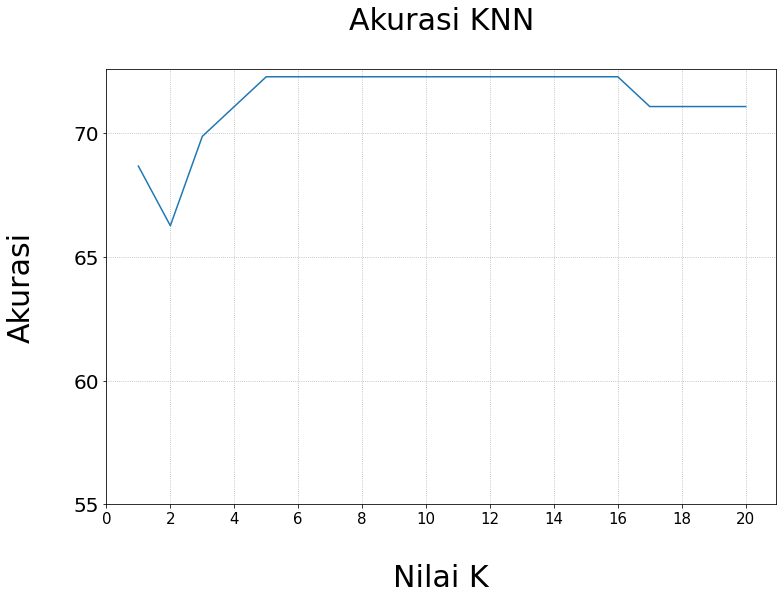

In [23]:
import matplotlib.pyplot as plt

K = list(range(1, len(hasil)+1))
plt.rcParams["figure.figsize"] = (12, 8)
plt.plot(K, hasil)
plt.title('Akurasi KNN\n', size = 30)
plt.xlabel('\nNilai K', size=30)
plt.ylabel('Akurasi\n', size=30)
plt.grid(linestyle=':')
# plt.xticks(np.arange(0,len(K)+1, 1), size = 15)
plt.xticks(np.arange(0,len(K)+1, 2), size = 15)
plt.yticks(np.arange(55, max(hasil)+2, 5), size = 20)
plt.show()

In [24]:
k = hasil.index(max(hasil))+1
k

5

In [25]:
hasil

[68.67469879518072,
 66.26506024096386,
 69.87951807228916,
 71.08433734939759,
 72.28915662650603,
 72.28915662650603,
 72.28915662650603,
 72.28915662650603,
 72.28915662650603,
 72.28915662650603,
 72.28915662650603,
 72.28915662650603,
 72.28915662650603,
 72.28915662650603,
 72.28915662650603,
 72.28915662650603,
 71.08433734939759,
 71.08433734939759,
 71.08433734939759,
 71.08433734939759]

In [26]:
import time
start = time.time()
final_model = KNeighborsClassifier(n_neighbors = k, weights = 'distance', p = 2).fit(X_train, Y_train)
print("{:.2f}".format(final_model.score(X_test, Y_test)*100),"%")
end = time.time()
print("KNN running time:", end-start)

72.29 %
KNN running time: 0.06800413131713867


In [27]:
x_testing = np.array(X_test)
y_testing = np.array(Y_test)

In [28]:
y_testing[9]

'Kontra'

In [29]:
final_model.predict(x_testing[9].reshape(1, -1))

array(['Netral'], dtype=object)

In [30]:
y_pred = final_model.predict(X_test)

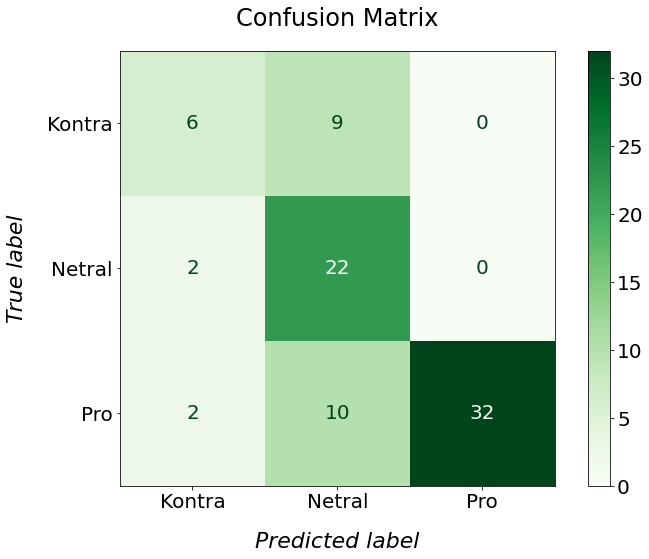



              precision    recall  f1-score   support

      Kontra       0.60      0.40      0.48        15
      Netral       0.54      0.92      0.68        24
         Pro       1.00      0.73      0.84        44

    accuracy                           0.72        83
   macro avg       0.71      0.68      0.67        83
weighted avg       0.79      0.72      0.73        83

Total Akurasi:  72.29 %
Error Rate   :  27.71 %


In [31]:
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
TA = max(hasil)
ER = (100 - TA)

plt.rcParams.update({'font.size': 20})
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred, cmap = "Greens")
plt.title("Confusion Matrix", fontsize = 24, pad = 25)
plt.ylabel('True label', fontsize = 22, labelpad=20, style= "oblique")
plt.xlabel('Predicted label', fontsize = 22, labelpad=20, style="oblique")

plt.show()

print("\n") 
print(classification_report(Y_test, y_pred))
print("Total Akurasi: ", "{:.2f}".format(TA),"%")
print("Error Rate   : ", "{:.2f}".format(ER),"%")

In [32]:
# SVM
kernel = ['rbf', 'poly', 'linear', 'sigmoid']
hasil_kernel = []
kernel_time = []
for u in kernel:
    start = time.time()
    svm_model = SVC(kernel = u).fit(X_train, Y_train)
    end = time.time()
    hasil_kernel.append("{:.2f}".format(svm_model.score(X_test, Y_test)*100))
    kernel_time.append(end-start)

kernel = ['RBF', 'Poly', 'Linear', 'Sigmoid']
desc = ['Accuracy', 'Time(s)']
data = [hasil_kernel, kernel_time]
data = {"SVM Kernel":kernel,
        "Time (s)":kernel_time,
        "Accuracy":hasil_kernel}
best_kernel =  pd.DataFrame(data)
best_kernel

,SVM Kernel,Time (s),Accuracy
0,RBF,0.073003,71.08
1,Poly,0.047018,62.65
2,Linear,0.034988,66.27
3,Sigmoid,0.037001,69.88


In [33]:
# Naive Bayes

nb_model = [GaussianNB, MultinomialNB, BernoulliNB, ComplementNB]
hasil_nb = []
nb_time = []
for u in nb_model:
    start = time.time()
    nb = u().fit(X_train, Y_train)
    end = time.time()
    hasil_nb.append("{:.2f}".format(nb.score(X_test, Y_test)*100))
    nb_time.append(end-start)
    
nb_model = ['Gaussian', 'Multinomial', 'Bernoulli', 'Complement']
# desc = ['Accuracy', 'Time (s)']
data = {"NB Model":nb_model,
        "Time (s)":nb_time,
        "Accuracy":hasil_nb}
best_nb =  pd.DataFrame(data)
# best_nb = best_nb.astype({"Unit_Price": float})
best_nb

,NB Model,Time (s),Accuracy
0,Gaussian,0.023992,65.06
1,Multinomial,0.030005,66.27
2,Bernoulli,0.028014,62.65
3,Complement,0.028001,62.65
